# Imports

In [0]:
from platform import python_version

In [188]:
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.6.9


In [0]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from platform import python_version
from mlxtend.plotting import plot_confusion_matrix

from google.colab import drive

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [0]:
from sklearn.pipeline import Pipeline
import sklearn.model_selection
from sklearn.model_selection import train_test_split

import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, FunctionTransformer, LabelEncoder

from sklearn.utils.multiclass import unique_labels

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [0]:
# !sudo apt-get install build-essential swig
# !curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
# !pip install auto-sklearn

In [0]:
# import autosklearn.classification

In [193]:
np.__version__

'1.18.5'

In [194]:
pd.__version__

'1.0.4'

In [0]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [0]:
global use_preprocs

In [0]:
use_preprocs = False

# DF

In [198]:
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
caminho = 'gdrive/My Drive/Colab Notebooks/CodeNation/final/'

In [200]:
!ls 'gdrive/My Drive/Colab Notebooks/CodeNation/final/'

estaticos_market.csv  Final.ipynb


In [0]:
df = pd.read_csv(caminho + 'estaticos_market.csv', index_col=0, parse_dates=['dt_situacao'])

In [0]:
df1 = pd.read_csv('https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv', usecols=['id'])

df2 = pd.read_csv('https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv', usecols=['id'])

df3 = pd.read_csv('https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv', usecols=['id'])

In [0]:
df1['portifolio'] = 1

In [0]:
df2['portifolio'] = 2

In [0]:
df3['portifolio'] = 3

In [0]:
temp = pd.DataFrame()

In [0]:
temp = temp.append([df1, df2, df3])

In [208]:
df.shape

(462298, 181)

In [0]:
df.drop_duplicates('id', keep='first', inplace=True)

In [210]:
df.shape

(462298, 181)

In [0]:
df = df.merge(temp, how='left', on='id')

In [212]:
df.shape

(462406, 182)

In [0]:
df['portifolio'] = df['portifolio'].fillna(0)

In [214]:
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(462406, 182)
(555, 2)
(566, 2)
(265, 2)


In [215]:
df.columns

Index(['id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat', 'fl_me',
       ...
       'max_meses_servicos', 'min_meses_servicos', 'qt_funcionarios',
       'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais', 'portifolio'],
      dtype='object', length=182)

In [0]:
del df1
del df2
del df3

In [0]:
def basic_summary(df):
    return pd.DataFrame({
        'df dtype': df.dtypes,
        'df nulls': df.isna().sum(),
        'df nulls (%)': df.isna().mean() * 100
    })

df_info = basic_summary(df)

# Features

In [218]:
df_info.sort_values(by='df nulls (%)', ascending=False)

,df dtype,df nulls,df nulls (%)
qt_alteracao_socio_total,float64,462406,100.00
grau_instrucao_macro_desconhecido,float64,462406,100.00
qt_alteracao_socio_180d,float64,462406,100.00
qt_alteracao_socio_365d,float64,462406,100.00
qt_alteracao_socio_90d,float64,462406,100.00
...,...,...,...
fl_ltda,bool,0,0.00
fl_st_especial,bool,0,0.00
fl_email,bool,0,0.00
fl_telefone,bool,0,0.00


In [0]:
temp = df_info['df nulls (%)'] > 40

cols = list(df.columns[temp])
cols.append('dt_situacao')

In [220]:
temp

id                         False
fl_matriz                  False
de_natureza_juridica       False
sg_uf                      False
natureza_juridica_macro    False
                           ...  
tx_crescimento_12meses      True
tx_crescimento_24meses      True
tx_rotatividade             True
qt_filiais                 False
portifolio                 False
Name: df nulls (%), Length: 182, dtype: bool

In [0]:
df.drop(columns=cols, inplace=True)

In [222]:
df.shape

(462406, 50)

In [223]:
print(f'Remove null values: \n{cols}')

Remove null values: 
['vl_total_tancagem', 'vl_total_veiculos_antt', 'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art', 'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo', 'vl_potenc_cons_oleo_gas', 'de_indicador_telefone', 'vl_frota', 'qt_socios_st_suspensa', 'qt_socios_masculino', 'qt_socios_feminino', 'qt_socios_pep', 'qt_alteracao_socio_total', 'qt_alteracao_socio_90d', 'qt_alteracao_socio_180d', 'qt_alteracao_socio_365d', 'qt_socios_pj_ativos', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos', 'vl_idade_media_socios_pj', 'vl_idade_maxima_socios_pj', 'vl_idade_minima_socios_pj', 'qt_coligados', 'qt_socios_coligados', 'qt_coligados_matriz', 'qt_coligados_ativo', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa', 'qt_coligados_nula', 'idade_media_coligadas', 'idade_maxima_coligadas', 'idade_minima_coligadas', 'coligada_mais_nova_ativa', 'coligada_mais_antiga_ativa', 'idade_media_coligadas_ativas

In [0]:
del df_info

In [0]:
for col in df.columns:
    if 'fl_' in col:
        if {'SIM', 'NAO'} <= set(df[col]):
            df[col] = (df[col]=='SIM')
        df[col] = df[col].fillna(False).astype('int')

In [226]:
temp = df.select_dtypes('object').columns[1:]

for col in temp:
    print(col)
    df[col] = df[col].fillna('NULL')
    print(df[col].unique())
    print()

de_natureza_juridica
['SOCIEDADE EMPRESARIA LIMITADA' 'EMPRESARIO INDIVIDUAL' 'COOPERATIVA'
 'ASSOCIACAO PRIVADA' 'ENTIDADE SINDICAL' 'CONSORCIO DE SOCIEDADES'
 'SOCIEDADE DE ECONOMIA MISTA' 'CONDOMINIO EDILICIO'
 'ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL' 'MUNICIPIO'
 'ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO' 'SOCIEDADE ANONIMA ABERTA'
 'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA'
 'CANDIDATO A CARGO POLITICO ELETIVO' 'EMPRESA INDIVIDUAL IMOBILIARIA'
 'ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL'
 'SOCIEDADE SIMPLES LIMITADA' 'FUNDACAO PRIVADA'
 'ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL' 'SOCIEDADE ANONIMA FECHADA'
 'ORGANIZACAO RELIGIOSA' 'SOCIEDADE UNIPESSOAL DE ADVOCACIA'
 'SOCIEDADE SIMPLES PURA' 'AUTARQUIA FEDERAL'
 'ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL' 'EMPRESA PUBLICA'
 'SOCIEDADE EMPRESARIA EM NOME COLETIVO' 'AUTARQUIA MUNICIPAL'
 'FUNDO PUBLICO' 'AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL'
 'FUNDACAO PUBLICA DE DIREI

In [0]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [0]:
if not use_preprocs:
    df = MultiColumnLabelEncoder(columns = temp).fit_transform(df)

In [0]:
df = df.fillna(0)

In [230]:
df

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,portifolio
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,1,60,4,2,11,2,14.46,1,0,0,0,0,0,0,1,1,1,32,10,0,0,0,1,0.00,0.00,0,20,5,0,23.00,0,0,0.00,6,48,1,2.00,2.00,0.00,44.00,47.00,41.00,2.00,2,2,3132172.80,3132172.80,0,0.00
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1,17,3,5,21,5,1.46,0,0,0,0,1,0,0,1,1,1,3,3,0,0,0,0,0.00,0.00,0,17,2,1,9.00,1,0,468.93,4,70,1,1.00,1.00,0.00,27.00,27.00,27.00,1.00,10,10,210000.00,210000.00,0,0.00
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,1,17,1,5,32,5,7.09,3,0,0,0,1,0,0,0,1,1,87,21,0,0,0,1,0.00,0.00,1,2,0,0,26.00,2,0,713.50,2,43,1,1.00,1.00,0.00,32.00,32.00,32.00,0.00,1,1,50000.00,50000.00,0,0.00
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1,17,1,5,25,5,6.51,3,0,0,0,0,0,0,1,1,1,75,18,0,0,0,1,0.00,0.00,0,2,0,0,26.00,2,0,475.73,2,43,1,1.00,1.00,0.00,36.00,36.00,36.00,1.00,10,10,210000.00,210000.00,0,0.00
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,1,17,4,5,27,5,3.20,0,0,0,0,0,0,0,1,1,1,78,8,0,0,0,1,0.00,0.00,0,20,5,0,27.00,0,0,2874.04,6,48,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,10,10,210000.00,210000.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462401,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,1,17,4,5,3,1,3.25,0,0,0,0,1,0,0,1,1,0,28,9,0,0,0,1,0.00,0.00,1,20,5,0,22.00,0,0,585.63,0,14,0,1.00,1.00,0.00,31.00,31.00,31.00,1.00,1,1,50000.00,50000.00,0,0.00
462402,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,1,17,3,5,20,5,8.95,3,0,0,0,0,0,0,0,0,1,77,5,0,0,0,0,0.00,0.00,0,17,3,0,23.00,3,0,2429.89,4,70,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10,10,210000.00,210000.00,0,0.00
462403,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,1,0,2,3,24,5,20.75,5,0,0,0,0,0,0,0,0,1,11,19,0,0,0,0,0.00,0.00,0,9,0,0,23.00,2,0,3150.81,8,0,1,1.00,1.00,0.00,74.00,74.00,74.00,1.00,10,10,210000.00,210000.00,0,0.00
462404,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,1,60,5,2,5,1,1.91,0,0,0,0,0,0,0,1,0,0,30,9,0,0,0,0,0.00,0.00,0,21,5,0,20.00,0,0,2752.49,10,49,0,5.00,5.00,0.00,31.67,39.00,25.00,3.00,7,7,432734.40,432734.40,0,0.00


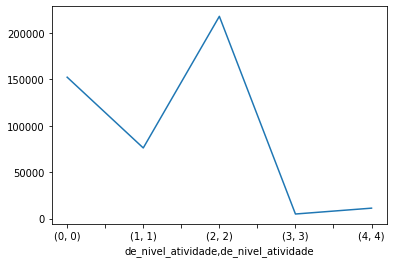

In [231]:
df.groupby('de_nivel_atividade')['de_nivel_atividade'].value_counts().plot()

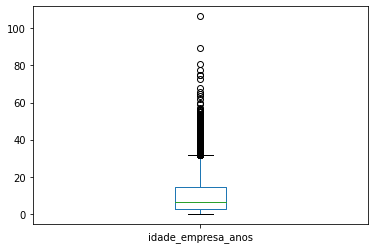

In [232]:
df['idade_empresa_anos'].plot(kind="box");

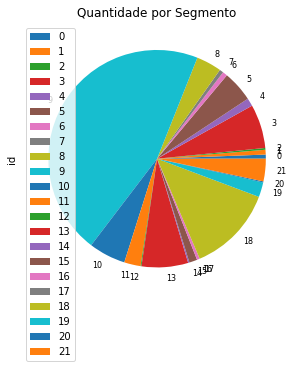

In [233]:
df[['id',
    'nm_segmento']].groupby(['nm_segmento']).count().plot.pie(y='id',
                                                  fontsize=8,
                                                  title='Quantidade por Segmento',
                                                  figsize=(5, 5))

In [234]:
df.dtypes

id                                        object
fl_matriz                                  int64
de_natureza_juridica                       int64
sg_uf                                      int64
natureza_juridica_macro                    int64
de_ramo                                    int64
setor                                      int64
idade_empresa_anos                       float64
idade_emp_cat                              int64
fl_me                                      int64
fl_sa                                      int64
fl_epp                                     int64
fl_mei                                     int64
fl_ltda                                    int64
fl_st_especial                             int64
fl_email                                   int64
fl_telefone                                int64
fl_rm                                      int64
nm_divisao                                 int64
nm_segmento                                int64
fl_spa              

# Pipeline

In [0]:
numeric_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p))
])

In [0]:
# ordinal_transformer = Pipeline(steps=[
#     ('he', ce.HelmertEncoder())
# ])

In [0]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [0]:
column_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, df[df['portifolio'] > 0].select_dtypes('float64').columns[:-1]),
        ('cat', categorical_transformer, df[df['portifolio'] > 0].select_dtypes('object').columns[1:]),
        # ('ord', ordinal_transformer, df.select_dtypes('object').columns[1:]),
    ],
    remainder='passthrough'
)

In [0]:
pre_processor = Pipeline(steps=[
    ('col', column_transformer)
])

In [240]:
df.dtypes

id                                        object
fl_matriz                                  int64
de_natureza_juridica                       int64
sg_uf                                      int64
natureza_juridica_macro                    int64
de_ramo                                    int64
setor                                      int64
idade_empresa_anos                       float64
idade_emp_cat                              int64
fl_me                                      int64
fl_sa                                      int64
fl_epp                                     int64
fl_mei                                     int64
fl_ltda                                    int64
fl_st_especial                             int64
fl_email                                   int64
fl_telefone                                int64
fl_rm                                      int64
nm_divisao                                 int64
nm_segmento                                int64
fl_spa              

# Split

In [0]:
temp = df[df['portifolio'] > 0]

In [242]:
temp[temp['portifolio'] == 0].dtypes

id                                        object
fl_matriz                                  int64
de_natureza_juridica                       int64
sg_uf                                      int64
natureza_juridica_macro                    int64
de_ramo                                    int64
setor                                      int64
idade_empresa_anos                       float64
idade_emp_cat                              int64
fl_me                                      int64
fl_sa                                      int64
fl_epp                                     int64
fl_mei                                     int64
fl_ltda                                    int64
fl_st_especial                             int64
fl_email                                   int64
fl_telefone                                int64
fl_rm                                      int64
nm_divisao                                 int64
nm_segmento                                int64
fl_spa              

In [0]:
temp = temp.fillna(0)

In [0]:
if use_preprocs:
    temp = pre_processor.fit_transform(temp.drop(columns=['id', 'portifolio']))
    train, test, train_labels, test_labels = train_test_split(temp, df[df['portifolio'] > 0]['portifolio'].values, test_size=0.1, random_state=42)
else:
    train, test, train_labels, test_labels = train_test_split(temp.drop(columns=['portifolio', 'id']), temp['portifolio'].values, test_size=0.1, random_state=42)

# AutoML

In [0]:
# model = autosklearn.classification.AutoSklearnClassifier(
#         time_left_for_this_task=3600, #6 horas 21600
#         per_run_time_limit=300,
#         tmp_folder='/tmp/autosklearn_sequential_tmp0',
#         output_folder='/tmp/autosklearn_sequential_out0',
#         ensemble_size=0,
#         delete_tmp_folder_after_terminate=True,
#         include_preprocessors=["no_preprocessing", ], 
#         seed = 42,
#         ml_memory_limit = 8720,
#         resampling_strategy = 'holdout',
#         n_jobs=4
#     )

In [0]:
# model.fit(train, train_labels)

In [0]:
# model.fit_ensemble(train_labels, ensemble_size=50)

In [0]:
# print(model.show_models())

In [0]:
# model.cv_results_['mean_test_score']

In [0]:
# model.cv_results_

In [0]:
# automl.cv_results_preds = model.predict(test)

In [0]:
# model.score(test, test_labels)

In [0]:
# cv_results = pd.DataFrame(model.cv_results_)

In [0]:
# cv_results[cv_results['mean_test_score'] > 0.5]

In [0]:
# list(cv_results.iloc[4])

In [0]:
# print(model.sprint_statistics())

In [0]:
# preds = model.predict(test)

# Models

In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# model = LogisticRegression(verbose=1) #0.4712230215827338
model = RandomForestClassifier(n_estimators=1000) # , max_depth=None, random_state=42#0.76
# model = DecisionTreeClassifier() #0.7589928057553957
# model = MLPClassifier(max_iter=200) #0.59
# model = KNeighborsClassifier(n_neighbors=10) #0.7805755395683454

In [260]:
model.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
preds = model.predict(test)

In [262]:
print(model.score(test, test_labels))

0.7338129496402878


In [263]:
print(model.score(train, train_labels))

0.9318364073777065


In [264]:
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        56
         2.0       0.70      0.64      0.67        59
         3.0       0.28      0.33      0.30        24

    accuracy                           0.73       139
   macro avg       0.66      0.66      0.66       139
weighted avg       0.75      0.73      0.74       139



In [265]:
metrics.confusion_matrix(test_labels, preds)

array([[56,  0,  0],
       [ 0, 38, 21],
       [ 0, 16,  8]])

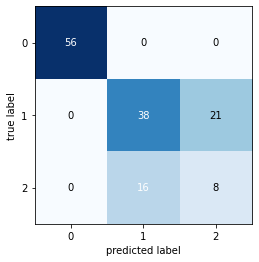

In [266]:
fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(test_labels, preds))

# Cross

In [0]:
# cross_validate(automl, train, train_labels, cv=5)

In [0]:
# cross_val_score(automl, train, train_labels, cv=5)

In [0]:
# cross_val_predict(automl, train, train_labels, cv=10)

# Results

In [0]:
if use_preprocs:
    preds = pre_processor.fit_transform(df[df['portifolio'] == 0].drop(columns=['portifolio','id']).fillna(0))
    preds_proba = model.predict_proba(preds)
else:
    preds_proba = model.predict_proba(df.drop(columns=['portifolio','id'])[df['portifolio'] == 0])

In [271]:
len(preds_proba)

461020

In [272]:
preds_proba[:5]

array([[0.829  , 0.1655 , 0.0055 ],
       [0.719  , 0.14525, 0.13575],
       [0.84   , 0.08475, 0.07525],
       [0.827  , 0.096  , 0.077  ],
       [0.756  , 0.124  , 0.12   ]])

In [0]:
top_n_pred = np.argsort(preds_proba, axis=1) #[:,-n :]

In [274]:
len(top_n_pred)

461020

In [275]:
top_n_pred[:5]

array([[2, 1, 0],
       [2, 1, 0],
       [2, 1, 0],
       [2, 1, 0],
       [2, 1, 0]])

In [0]:
# df[df['portifolio'] == 0]

In [277]:
print(model.classes_[top_n_pred][0])
print(sorted(sorted(preds_proba[0], reverse=True))) #ordem inversa, primeiro dessa lista é o último da lista acima)

[3. 2. 1.]
[0.0055, 0.1655, 0.829]


In [0]:
a = {'id': [], 'portifolio': [], '%': []}

for index, ida in enumerate(list(df['id'])[:10000]): #LIMITE
  for i in range(3):
      a['id'].append(ida)
      a['portifolio'].append(model.classes_[top_n_pred][index][i])
      a['%'].append(sorted(sorted(preds_proba[index], reverse=True))[i])

In [0]:
final = pd.DataFrame.from_dict(a)

In [280]:
final

,id,portifolio,%
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,3.00,0.01
1,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,2.00,0.17
2,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,1.00,0.83
3,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,3.00,0.14
4,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,2.00,0.15
...,...,...,...
29995,9c7c1fe2da9458cbf1713d50190bde2aa453e6a5f7ac34...,2.00,0.09
29996,9c7c1fe2da9458cbf1713d50190bde2aa453e6a5f7ac34...,1.00,0.82
29997,7ee1f4f24d2c421e62e3a067e050b600c10d43ddd22f8f...,3.00,0.00
29998,7ee1f4f24d2c421e62e3a067e050b600c10d43ddd22f8f...,2.00,0.00


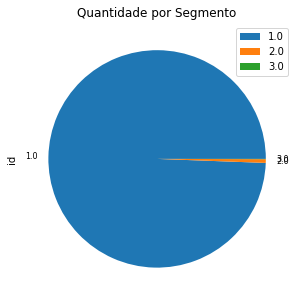

In [281]:
final.loc[final.groupby(["id"])["%"].idxmax()].groupby(['portifolio']).count().plot.pie(y='id', fontsize=8, title='Quantidade por Segmento', figsize=(5, 5))

In [0]:
def f(x):
    print(final[final['%'] > x / 100].sort_values(by=['portifolio', '%'], ascending=False))
    return x

In [283]:
interact(f, x=widgets.IntSlider(min=0, max=99, step=1, value=95));

interactive(children=(IntSlider(value=95, description='x', max=99), Output()), _dom_classes=('widget-interact'…